# Test Classification
----
In this notebook we do a bit of testing on classification based on only a single feature: the Mel-frequency Cepstral Coefficients (MFCCs)

In [86]:
import pandas as pd
import numpy as np
from audio_feature_extraction import BatchExtractor, FeatureVisualizer
import seaborn as sns
import warnings

In [65]:
%load_ext autoreload
%autoreload 2
warnings.filterwarnings('ignore')
sns.set()
sns.set_context('talk')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
bird_index = pd.read_csv('bird_index_clean.csv', index_col=0)

In [5]:
bird_index

,english_cname,file_name,genus,species,label
name,,,,,
XC17804,Abert's Towhee,XC17804.mp3,Melozone,aberti,Melozone aberti
XC177367,Abert's Towhee,XC177367.mp3,Melozone,aberti,Melozone aberti
XC145505,Abert's Towhee,XC145505.mp3,Melozone,aberti,Melozone aberti
XC228159,Abert's Towhee,XC228159.mp3,Melozone,aberti,Melozone aberti
XC51313,Abert's Towhee,XC51313.mp3,Melozone,aberti,Melozone aberti
...,...,...,...,...,...
XC278880,Yellow-breasted Chat,XC278880.mp3,Icteria,virens,Icteria virens
XC247723,Yellow-breasted Chat,XC247723.mp3,Icteria,virens,Icteria virens
XC408122,Yellow-breasted Chat,XC408122.mp3,Icteria,virens,Icteria virens


In [6]:
rand_labels = np.random.choice(bird_index.label.unique(), 10, replace=False)

In [7]:
rand_labels

array(['Strix occidentalis', 'Leiothlypis celata', 'Poecile gambeli',
       'Agelaius tricolor', 'Aphelocoma californica',
       'Passerella megarhyncha', 'Vireo huttoni', 'Haemorhous cassinii',
       'Pica nuttalli', 'Melozone aberti'], dtype=object)

In [8]:
bird_index_class_sample = bird_index.loc[bird_index.label.isin(rand_labels)]

In [9]:
bird_index_class_sample

,english_cname,file_name,genus,species,label
name,,,,,
XC17804,Abert's Towhee,XC17804.mp3,Melozone,aberti,Melozone aberti
XC177367,Abert's Towhee,XC177367.mp3,Melozone,aberti,Melozone aberti
XC145505,Abert's Towhee,XC145505.mp3,Melozone,aberti,Melozone aberti
XC228159,Abert's Towhee,XC228159.mp3,Melozone,aberti,Melozone aberti
XC51313,Abert's Towhee,XC51313.mp3,Melozone,aberti,Melozone aberti
...,...,...,...,...,...
XC166985,Yellow-billed Magpie,XC166985.mp3,Pica,nuttalli,Pica nuttalli
XC361095,Yellow-billed Magpie,XC361095.mp3,Pica,nuttalli,Pica nuttalli
XC360735,Yellow-billed Magpie,XC360735.mp3,Pica,nuttalli,Pica nuttalli


In [10]:
bird_index_class_sample.label.value_counts()

Haemorhous cassinii       30
Aphelocoma californica    30
Pica nuttalli             30
Poecile gambeli           30
Passerella megarhyncha    30
Vireo huttoni             30
Melozone aberti           30
Strix occidentalis        30
Leiothlypis celata        30
Agelaius tricolor         30
Name: label, dtype: int64

In [11]:
bird_index.label.value_counts().sort_values()

Turdus migratorius      30
Spizella breweri        30
Mimus polyglottos       30
Rallus obsoletus        30
Empidonax wrightii      30
                        ..
Agelaius phoeniceus     30
Anser caerulescens      30
Spizella atrogularis    30
Agelaius tricolor       30
Vireo vicinior          30
Name: label, Length: 91, dtype: int64

In [12]:
be = BatchExtractor(frame_length=2048, audio_index=bird_index_class_sample)

In [13]:
samp_feats_flat = be.merge_and_flatten_features(
    ['mfcc', 'zcr', 'centroid', 'bandwidth', 'rms', 'contrast', 'flatness', 'rolloff', 'tonnetz', 'ccqt', 'cstft', 'ccens'],
    label=True)

In [14]:
samp_feats_flat

,mfcc_0_0,mfcc_0_1,mfcc_0_2,mfcc_0_3,mfcc_0_4,mfcc_0_5,mfcc_0_6,mfcc_0_7,mfcc_0_8,mfcc_0_9,...,ccens_11_3325,ccens_11_3326,ccens_11_3327,ccens_11_3328,ccens_11_3329,ccens_11_3330,ccens_11_3331,ccens_11_3332,ccens_11_3333,label
XC17804,-494.07560,-488.92722,-491.55860,-495.13812,-488.83066,-483.52200,-495.62730,-503.31270,-503.54276,-505.31165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Melozone aberti
XC177367,-382.11768,-366.36200,-361.82214,-362.91815,-362.21057,-362.54785,-366.56580,-360.38130,-350.37160,-348.70980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Melozone aberti
XC145505,-376.90668,-364.54642,-365.62314,-365.37903,-363.89114,-370.03314,-368.38986,-358.75644,-362.57138,-370.52042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Melozone aberti
XC228159,-334.96152,-305.82584,-272.26868,-254.94487,-270.16020,-271.72840,-257.92206,-256.23688,-262.03550,-275.46082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Melozone aberti
XC51313,-438.15494,-319.08200,-264.05430,-247.47067,-241.95306,-243.51330,-250.78343,-246.05624,-248.12039,-253.08673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Melozone aberti
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XC166985,-606.49390,-513.76380,-480.59103,-485.54456,-494.55377,-499.40295,-497.83054,-501.00750,-503.79000,-505.63425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pica nuttalli
XC361095,-649.84064,-649.84064,-649.84064,-649.84064,-649.73420,-637.04736,-621.99176,-596.86304,-569.89070,-546.24960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pica nuttalli
XC360735,-754.93054,-754.93054,-753.99900,-723.68770,-672.42300,-621.44610,-577.74005,-542.16895,-509.21295,-477.77320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pica nuttalli
XC360670,-792.54816,-792.54816,-792.54816,-780.97095,-736.28440,-681.79100,-641.22100,-601.52890,-562.14410,-530.47510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pica nuttalli


In [103]:
samp_feats_flat.to_csv('test.csv')

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [16]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [17]:
ss = StandardScaler()
le = LabelEncoder()

In [18]:
X = samp_feats_flat.iloc[:,:-1]
y = samp_feats_flat.label

In [19]:
X

,mfcc_0_0,mfcc_0_1,mfcc_0_2,mfcc_0_3,mfcc_0_4,mfcc_0_5,mfcc_0_6,mfcc_0_7,mfcc_0_8,mfcc_0_9,...,ccens_11_3324,ccens_11_3325,ccens_11_3326,ccens_11_3327,ccens_11_3328,ccens_11_3329,ccens_11_3330,ccens_11_3331,ccens_11_3332,ccens_11_3333
XC17804,-494.07560,-488.92722,-491.55860,-495.13812,-488.83066,-483.52200,-495.62730,-503.31270,-503.54276,-505.31165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC177367,-382.11768,-366.36200,-361.82214,-362.91815,-362.21057,-362.54785,-366.56580,-360.38130,-350.37160,-348.70980,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC145505,-376.90668,-364.54642,-365.62314,-365.37903,-363.89114,-370.03314,-368.38986,-358.75644,-362.57138,-370.52042,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC228159,-334.96152,-305.82584,-272.26868,-254.94487,-270.16020,-271.72840,-257.92206,-256.23688,-262.03550,-275.46082,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC51313,-438.15494,-319.08200,-264.05430,-247.47067,-241.95306,-243.51330,-250.78343,-246.05624,-248.12039,-253.08673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XC166985,-606.49390,-513.76380,-480.59103,-485.54456,-494.55377,-499.40295,-497.83054,-501.00750,-503.79000,-505.63425,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC361095,-649.84064,-649.84064,-649.84064,-649.84064,-649.73420,-637.04736,-621.99176,-596.86304,-569.89070,-546.24960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC360735,-754.93054,-754.93054,-753.99900,-723.68770,-672.42300,-621.44610,-577.74005,-542.16895,-509.21295,-477.77320,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
XC360670,-792.54816,-792.54816,-792.54816,-780.97095,-736.28440,-681.79100,-641.22100,-601.52890,-562.14410,-530.47510,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_encoded = le.fit_transform(y)
y_encoded

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

In [21]:
x_train, x_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.15)
x_train_std = ss.fit_transform(x_train)
x_val_std = ss.transform(x_val)

In [22]:
x_train_std.shape

(255, 250050)

In [23]:
pca = PCA(n_components=60)

In [24]:
x_train_pca = pca.fit_transform(x_train_std)
x_val_pca = pca.transform(x_val_std)

In [125]:
knn = KNeighborsClassifier(n_neighbors=30)

In [126]:
knn.fit(x_train_pca, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [127]:
knn.score(x_train_pca, y_train)

0.2196078431372549

In [128]:
from sklearn.naive_bayes import GaussianNB

In [129]:
gnb = GaussianNB()

In [130]:
gnb.fit(x_train_pca, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [131]:
gnb.score(x_train_pca, y_train)

0.3607843137254902

In [132]:
gnb.score(x_val_pca, y_val)

0.2222222222222222

In [133]:
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [134]:
gnb.score(x_train, y_train)

0.2627450980392157

In [135]:
from sklearn.ensemble import RandomForestClassifier

In [136]:
rfc = RandomForestClassifier(n_estimators=50, max_depth=2)

In [137]:
rfc.fit(x_train_pca, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [138]:
rfc.score(x_train_pca, y_train)

0.5215686274509804

In [139]:
rfc.score(x_val_pca, y_val)

0.13333333333333333

In [140]:
rfc = RandomForestClassifier()

In [69]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [70]:
param_grid = {'criterion': ['gini', 'entropy'],
             'max_depth': np.arange(2, 22, 2),
             'n_estimators': np.arange(10, 110, 10)}

In [71]:
rfs_gs = GridSearchCV(rfc, param_grid, cv=3, scoring='precision_micro')

In [72]:
rfs_gs.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [73]:
rfs_gs.best_score_

0.2851851851851852

In [74]:
rfs_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

In [76]:
gbc = GradientBoostingClassifier()

In [77]:
gbc.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [81]:
param_grid = {'learning_rate': 10**np.arange(-3.0, 4.0, 1.0),
             'max_depth': np.arange(2, 22, 2),
             'n_estimators': np.arange(100, 1000, 100)}

In [82]:
gbc_gs = GridSearchCV(gbc, param_grid, n_jobs=-1, scoring='f1_macro', cv=3)

In [83]:
gbc_gs.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
                                                  validation_fractio

In [84]:
gbc_gs.best_score_

0.19835554408483022

In [86]:
gbc_best = gbc_gs.best_estimator_

In [87]:
gbc_best.score(x_train_pca, y_train)

1.0

In [88]:
gbc_best.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 800,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [90]:
pca.explained_variance_ratio_

array([0.38875311, 0.12919876, 0.0784629 , 0.04482462, 0.03734646,
       0.02516539, 0.02160586, 0.01620496, 0.0149354 , 0.01245885,
       0.01139058, 0.01064544, 0.00900656, 0.00756446, 0.00686735,
       0.00610932, 0.00536389, 0.00523586, 0.00478699, 0.00464996,
       0.00424565, 0.003725  , 0.00353396, 0.00340401, 0.0033581 ,
       0.00327871, 0.00310748, 0.00304821, 0.0028048 , 0.00268843,
       0.00259532, 0.00248125, 0.00237747, 0.00230681, 0.00218606,
       0.00215324, 0.00203418, 0.00194829, 0.00190713, 0.00181181,
       0.0017767 , 0.00171049, 0.00169206, 0.00161792, 0.00159995,
       0.00144714, 0.00140914, 0.00139069, 0.00134359, 0.00133465,
       0.00128817, 0.00125408, 0.00121231, 0.00119298, 0.0011704 ,
       0.00114805, 0.00112274, 0.00110825, 0.00107651, 0.00106398,
       0.00105306, 0.00102846, 0.00101039, 0.00099301, 0.00098474,
       0.00097364, 0.00094962, 0.00092954, 0.00090649, 0.00090138,
       0.00089747, 0.00087582, 0.00086462, 0.00084436, 0.00083

In [67]:
import matplotlib.pyplot as plt

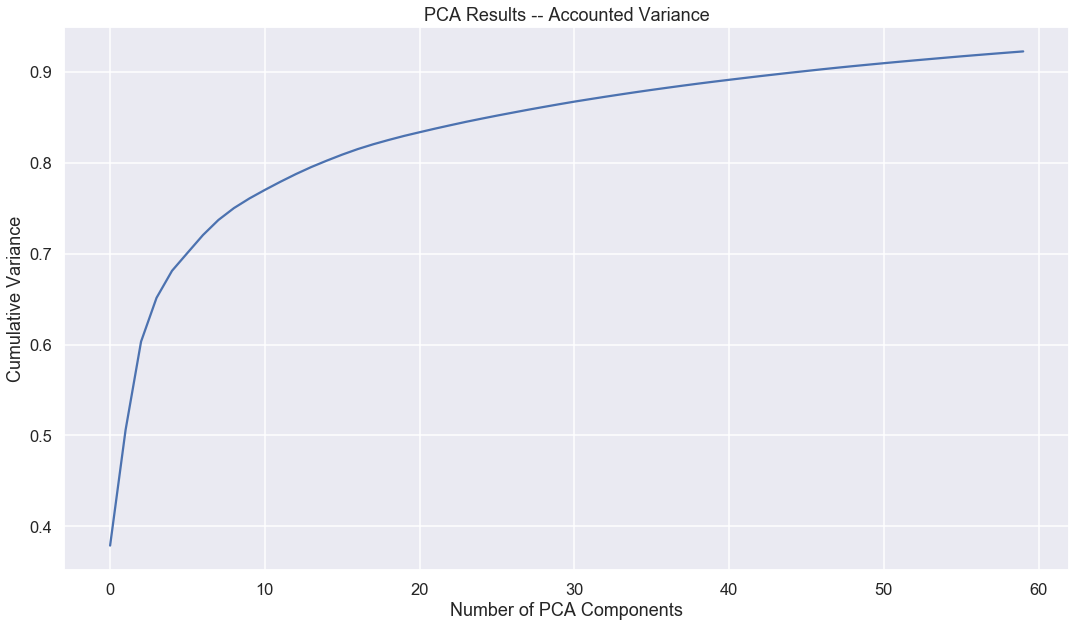

In [69]:
pca_fig, pca_ax = plt.subplots(figsize=(18,10))
sns.lineplot(data=np.cumsum(pca.explained_variance_ratio_), ax=pca_ax)
pca_ax.set_title('PCA Results -- Accounted Variance')
pca_ax.set_ylabel('Cumulative Variance')
pca_ax.set_xlabel('Number of PCA Components')
pca_fig.savefig('plots/pca.png')

In [143]:
pca = PCA(n_components=50)

In [187]:
x_train, x_val, y_train, y_val = train_test_split(X, y_encoded, test_size=0.30)
x_train_std = ss.fit_transform(x_train)
x_val_std = ss.transform(x_val)

In [188]:
x_train_pca = pca.fit_transform(x_train_std)
x_val_pca = pca.transform(x_val_std)

In [189]:
from sklearn.ensemble import ExtraTreesClassifier

In [190]:
etc = ExtraTreesClassifier(n_estimators=2000, max_depth=5, n_jobs=-1)

In [191]:
etc.fit(x_train_pca, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=5, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=2000, n_jobs=-1,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [192]:
etc.score(x_train_pca, y_train)

0.8333333333333334

In [193]:
etc.score(x_val_pca, y_val)

0.16666666666666666

In [194]:
from sklearn.ensemble import AdaBoostClassifier

In [214]:
etc = ExtraTreesClassifier(criterion='entropy', n_estimators=2000, max_depth=4, n_jobs=-1)
abc = AdaBoostClassifier(etc)

In [215]:
abc.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__bootstrap': False,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'entropy',
 'base_estimator__max_depth': 4,
 'base_estimator__max_features': 'auto',
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_impurity_split': None,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__n_estimators': 2000,
 'base_estimator__n_jobs': -1,
 'base_estimator__oob_score': False,
 'base_estimator__random_state': None,
 'base_estimator__verbose': 0,
 'base_estimator__warm_start': False,
 'base_estimator': ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
                      max_depth=4, max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_spl

In [222]:
param_grid = {'learning_rate': 10**np.arange(-2.0, 2.0, 1.0),
             'n_estimators': np.arange(50, 110, 10)}
abc_gs = GridSearchCV(abc, param_grid, cv=3, scoring='precision_macro', n_jobs=-1)

In [223]:
abc_gs.fit(x_train_pca, y_train)

KeyboardInterrupt: 

In [211]:
abc_gs.best_score_

0.9761904761904762

## XGBoost Classification
----
Alright, let's move onto a very powerful classification system, XGBoost. This requires the library to be installed, so make sure that is the case before running these cells.

In [1]:
import xgboost as xgb

In [37]:
xgbc = xgb.XGBClassifier(
    max_depth=2,
    learning_rate=0.1,
    n_estimators=300,
    objective='multi:softmax',
    num_classes=10,
    n_jobs=-1,
    reg_alpha=0.5,
    reg_lambda=1)

In [38]:
xgbc.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 2,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 300,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'multi:softmax',
 'random_state': 0,
 'reg_alpha': 0.5,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'num_classes': 10}

In [39]:
xgbc.fit(x_train_pca, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=-1,
              nthread=None, num_classes=10, objective='multi:softprob',
              random_state=0, reg_alpha=0.5, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [40]:
xgbc.score(x_train_pca, y_train)

1.0

In [41]:
xgbc.score(x_val_pca, y_val)

0.3111111111111111

In [51]:
xgbc = xgb.XGBClassifier(objective='multi:softmax', n_jobs=-1, booster='dart')
xgbc.get_params()

{'base_score': 0.5,
 'booster': 'dart',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'multi:softmax',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [52]:
param_grid = {'n_estimators': np.arange(100, 500, 100),
             'max_depth': np.arange(1, 6, 1),
             'reg_alpha': np.arange(0, 1, 0.2),
             'reg_lambda': [0.5, 1],
             'rate_drop': [0.1, 0.2],
             'skip_drop': [0.5]}
xgbc_gs = GridSearchCV(xgbc, param_grid, scoring='precision_macro', n_jobs=-1, cv=3)

In [53]:
xgbc_gs.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='dart',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='multi:softmax',
                                     random_state=0, reg_alpha=0, reg_lamb...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': array([1, 2, 3, 4, 5]),
                         'n_estimators': array([100, 200, 300, 400]),
                         'rate_drop': [0.1

In [54]:
xgbc_gs.best_score_

0.3061199497670085

In [55]:
xgbc_gs.best_estimator_.score(x_train_pca, y_train)

1.0

In [56]:
xgbc_best = xgbc_gs.best_estimator_

In [57]:
xgbc_best.get_params()

{'base_score': 0.5,
 'booster': 'dart',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 200,
 'n_jobs': -1,
 'nthread': None,
 'objective': 'multi:softprob',
 'random_state': 0,
 'reg_alpha': 0.4,
 'reg_lambda': 0.5,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1,
 'rate_drop': 0.1,
 'skip_drop': 0.5}

In [59]:
param_grid = {'rate_drop': np.arange(0.2, 1.2, 0.2),
              'skip_drop': np.arange(0.2, 1.2, 0.2)}
cv_gs_best = GridSearchCV(xgbc_best, param_grid, cv=3, n_jobs=-1, scoring='f1_macro')

In [60]:
cv_gs_best.fit(x_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='dart',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=-1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, rate_drop=0.1,
                                     reg_alpha=0.4, reg_lambda=0.5,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     skip_drop=0.5, subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'rate_drop': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'sk

In [61]:
cv_gs_best.best_score_

0.2613820485887505

In [62]:
xgb_best_f1 = cv_gs_best.best_estimator_

In [63]:
xgb_best_f1.score(x_val_pca, y_val)

0.3333333333333333

In [64]:
xgb_best_f1.score(x_train_pca, y_train)

1.0

In [87]:
fv = FeatureVisualizer()

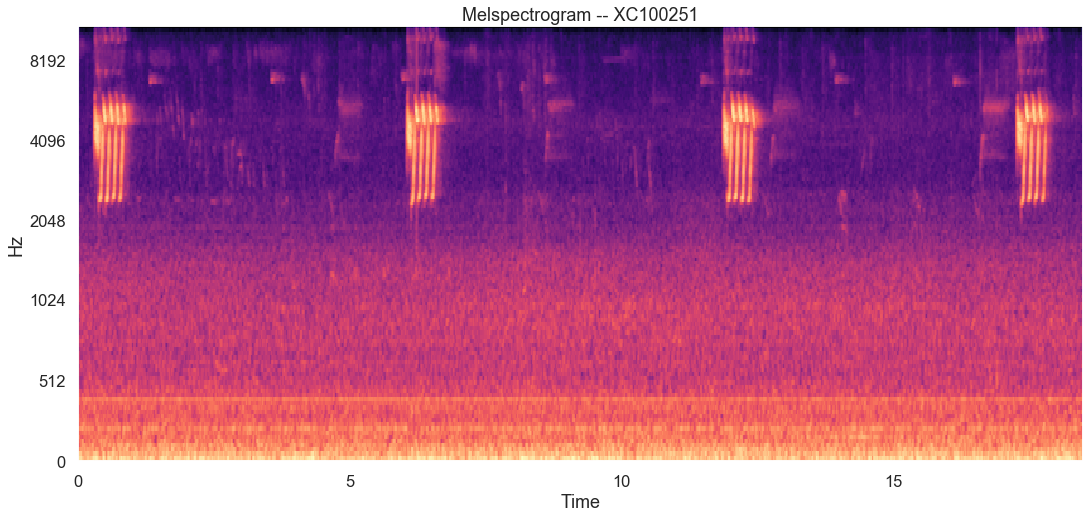

In [81]:
fig = fv.plot_melspec('XC100251')

In [82]:
fig.savefig('plots/xc100251_melspec_final.png')

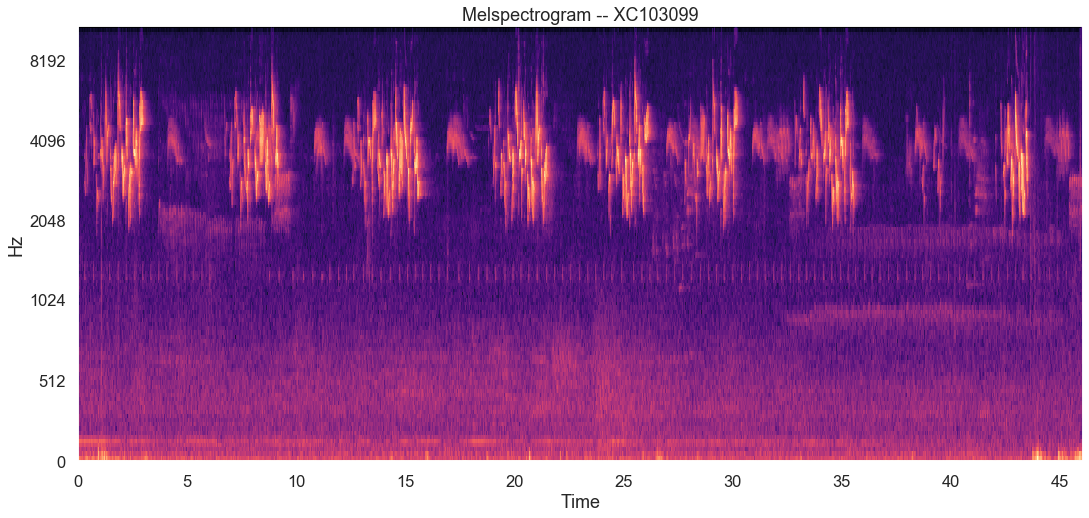

In [83]:
fig2 = fv.plot_melspec('XC103099')

In [84]:
fig2.savefig('plots/xc103099_melspec_final.png')

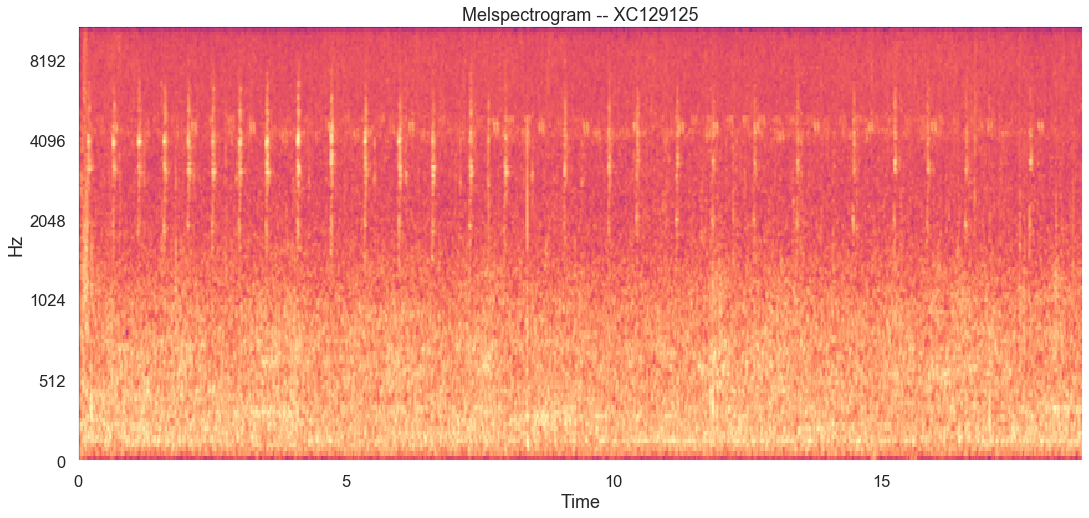

In [88]:
fig3 = fv.plot_melspec('XC129125')
fig3.savefig('plots/xc129125_melspec_final.png')